In [ ]:
import pandas as pd              
import numpy as np 
import tensorflow as tf

data = pd.read_csv("https://raw.githubusercontent.com/spyroy/deep-learning-bible-classification/main/bible_data_set%20(with%20count%20and%20testament).csv")
data

,citation,book,chapter,verse,text,length (charcters),words,testament
0,Genesis 1:1,Genesis,1,1,In the beginning God created the heaven and th...,56,10,old
1,Genesis 1:2,Genesis,1,2,"And the earth was without form, and void; and ...",144,29,old
2,Genesis 1:3,Genesis,1,3,"And God said, Let there be light: and there wa...",56,11,old
3,Genesis 1:4,Genesis,1,4,"And God saw the light, that it was good: and G...",87,17,old
4,Genesis 1:5,Genesis,1,5,"And God called the light Day, and the darkness...",117,22,old
...,...,...,...,...,...,...,...,...
31097,Revelation 22:17,Revelation,22,17,"And the Spirit and the bride say, Come. And le...",170,33,new
31098,Revelation 22:18,Revelation,22,18,For I testify unto every man that heareth the ...,189,37,new
31099,Revelation 22:19,Revelation,22,19,And if any man shall take away from the words ...,209,44,new
31100,Revelation 22:20,Revelation,22,20,"He which testifieth these things saith, Surely...",97,16,new


In [ ]:
 import nltk
nltk.download('punkt')
from nltk.stem import PorterStemmer

ps = PorterStemmer() 

vocabulary_size = 0
word2location = {}

def prepare_vocabulary(data):
    index = 0
    for sentance in data['text']:
        #sentance = sentance.lower()
        words = nltk.word_tokenize(sentance)
        for word in words:
            stemed_word = ps.stem(word)
            if stemed_word not in word2location:
                word2location[stemed_word] = index
                index += 1
    return index

def convert2vec(sentance):
    #sentance = sentance.lower()
    res_vec = np.zeros(vocabulary_size)
    words = nltk.word_tokenize(sentance)
    for word in words:
        stemed_word = ps.stem(word)
        if stemed_word in word2location:
            res_vec[word2location[stemed_word]]+=1
    return res_vec

books = ['Genesis', 'Exodus', 'Leviticus', 'Numbers', 'Deuteronomy', 'Joshua', 'Judges',
            'Ruth', '1 Samuel', '2 Samuel', '1 Kings', '2 Kings', '1 Chronicles', '2 Chronicles',
            'Ezra', 'Nehemiah', 'Esther', 'Job', 'Psalms', 'Proverbs', 'Ecclesiastes',
            'Song of Solomon', 'Isaiah', 'Jeremiah', 'Lamentations', 'Ezekiel', 'Daniel',
            'Hosea', 'Joel', 'Amos', 'Obadiah', 'Jonah', 'Micah', 'Nahum', 'Habakkuk',
            'Zephaniah', 'Haggai',    'Zechariah',    'Malachi', 'Matthew', 'Mark', 'Luke', 'John', 'Acts', 'Romans', '1 Corinthians',
            '2 Corinthians', 'Galatians', 'Ephesians', 'Philippians', 'Colossians',
            '1 Thessalonians', '2 Thessalonians', '1 Timothy', '2 Timothy', 'Titus', 'Philemon',
            'Hebrews', 'James', '1 Peter', '2 Peter', '1 John', '2 John', '3 John', 'Jude',
            'Revelation']

def encode(line):
    res_vec = np.zeros(66)
    idx = books.index(data.iloc[line]['book'])
    res_vec[idx] = 1
    return res_vec

vocabulary_size = prepare_vocabulary(data)
print("the size of the vocabulary is: ", vocabulary_size)
word2location

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
the size of the vocabulary is:  9421


{'In': 0,
 'the': 1,
 'begin': 2,
 'god': 3,
 'creat': 4,
 'heaven': 5,
 'and': 6,
 'earth': 7,
 '.': 8,
 'wa': 9,
 'without': 10,
 'form': 11,
 ',': 12,
 'void': 13,
 ';': 14,
 'dark': 15,
 'upon': 16,
 'face': 17,
 'of': 18,
 'deep': 19,
 'spirit': 20,
 'move': 21,
 'water': 22,
 'said': 23,
 'let': 24,
 'there': 25,
 'be': 26,
 'light': 27,
 ':': 28,
 'saw': 29,
 'that': 30,
 'it': 31,
 'good': 32,
 'divid': 33,
 'from': 34,
 'call': 35,
 'day': 36,
 'he': 37,
 'night': 38,
 'even': 39,
 'morn': 40,
 'were': 41,
 'first': 42,
 'a': 43,
 'firmament': 44,
 'in': 45,
 'midst': 46,
 'made': 47,
 'which': 48,
 'under': 49,
 'abov': 50,
 'so': 51,
 'second': 52,
 'gather': 53,
 'togeth': 54,
 'unto': 55,
 'one': 56,
 'place': 57,
 'dri': 58,
 'land': 59,
 'appear': 60,
 'sea': 61,
 'bring': 62,
 'forth': 63,
 'grass': 64,
 'herb': 65,
 'yield': 66,
 'seed': 67,
 'fruit': 68,
 'tree': 69,
 'after': 70,
 'hi': 71,
 'kind': 72,
 'whose': 73,
 'is': 74,
 'itself': 75,
 'brought': 76,
 'third'

In [ ]:
import random

rand = []
for r in range (6220):
            ra = random.randrange(0, 31100)
            rand.append(ra)
            
train_x = []
train_y = []
test_x = []
test_y = []
for i in range(len(data['text'])):
    if(i not in rand):
        train_x.append(i)
        train_y.append(i)
        
    elif(i in rand):
        test_x.append(i)
        test_y.append(i)

In [ ]:
data_x = np.array([convert2vec(data.iloc[i]['text']) for i in train_x])
data_y = np.array([encode(i) for i in train_y])
test_data_x = np.array([convert2vec(data.iloc[i]['text']) for i in test_x])
test_data_y = np.array([encode(i) for i in test_y])

In [ ]:
import random
tf.compat.v1.disable_v2_behavior()

features = vocabulary_size
categories = 66 #number of books
epsilon = 1e-12
(hidden1_size) = (50)
x = tf.compat.v1.placeholder(tf.float32,[None,features])
y_ = tf.compat.v1.placeholder(tf.float32,[None,categories])

W1 = tf.compat.v1.Variable(tf.compat.v1.truncated_normal([features, hidden1_size], stddev = 0.1))
b1 = tf.compat.v1.Variable(tf.constant(0.1, shape = [hidden1_size]))
z1 = tf.nn.relu(tf.matmul(x,W1)+b1)

W2 = tf.compat.v1.Variable(tf.compat.v1.truncated_normal([hidden1_size, categories], stddev = 0.1))
b2 = tf.compat.v1.Variable(tf.constant(0.1, shape = [categories]))
z2 = tf.nn.relu(tf.matmul(z1,W2)+b2)

# W3 = tf.compat.v1.Variable(tf.compat.v1.truncated_normal([hidden2_size, hidden3_size], stddev = 0.1))
# b3 = tf.compat.v1.Variable(tf.constant(0.1, shape = [hidden3_size]))
# z3 = tf.nn.relu(tf.matmul(z2,W3)+b3)

# W4 = tf.compat.v1.Variable(tf.compat.v1.truncated_normal([hidden3_size, categories], stddev = 0.1))
# b4 = tf.compat.v1.Variable(tf.constant(0.1, shape = [categories]))

y = tf.nn.softmax(tf.matmul(z1,W2)+b2)

cross_entropy = tf.reduce_mean(-tf.compat.v1.reduce_sum(y_*tf.compat.v1.log(y), reduction_indices = [1]))
train_step = tf.compat.v1.train.AdamOptimizer(0.0001).minimize(cross_entropy)

sess = tf.compat.v1.Session()
sess.run(tf.compat.v1.global_variables_initializer())

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
iteration_axis = np.array([])
accuracy_axis = np.array([])

for i in range (500):
    for _ in range(10):
        sess.run(train_step, feed_dict={x: data_x, y_: data_y})
    iteration_axis = np.append(iteration_axis, [i], axis=0)
    accuracy_axis = np.append(accuracy_axis, [sess.run(accuracy, feed_dict={x: data_x, y_: data_y})], axis=0)
    print("Iteration: ",i, " Accuracy:", sess.run(accuracy, feed_dict={x: data_x, y_: data_y}))


Iteration:  0  Accuracy: 0.021943081
Iteration:  1  Accuracy: 0.02429833
Iteration:  2  Accuracy: 0.027124632
Iteration:  3  Accuracy: 0.028655544
Iteration:  4  Accuracy: 0.030853778
Iteration:  5  Accuracy: 0.0329735
Iteration:  6  Accuracy: 0.035053976
Iteration:  7  Accuracy: 0.038076546
Iteration:  8  Accuracy: 0.040981356
Iteration:  9  Accuracy: 0.043768402
Iteration:  10  Accuracy: 0.048047107
Iteration:  11  Accuracy: 0.052836113
Iteration:  12  Accuracy: 0.057350345
Iteration:  13  Accuracy: 0.062414132
Iteration:  14  Accuracy: 0.068812564
Iteration:  15  Accuracy: 0.07536801
Iteration:  16  Accuracy: 0.08270854
Iteration:  17  Accuracy: 0.09099117
Iteration:  18  Accuracy: 0.09950932
Iteration:  19  Accuracy: 0.108184494
Iteration:  20  Accuracy: 0.118351325
Iteration:  21  Accuracy: 0.12671246
Iteration:  22  Accuracy: 0.13648675
Iteration:  23  Accuracy: 0.14618254
Iteration:  24  Accuracy: 0.15426889
Iteration:  25  Accuracy: 0.16408244
Iteration:  26  Accuracy: 0.173581

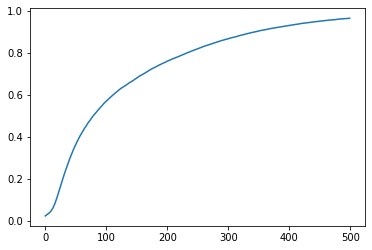

In [10]:
import matplotlib.pyplot as plt
plt.plot(iteration_axis, accuracy_axis)
plt.show()